In [2]:
import numpy as np
import skimage
import matplotlib as mp
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy.ndimage.filters import convolve
from matplotlib import rcParams
from scipy import signal

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        global img
        img = mpimg.imread(filename)
    return img

def gaussian_filter(n, sigma=1):
    n = int(n) // 2
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2)))) / (2.0 * np.pi * sigma**2)
    return g

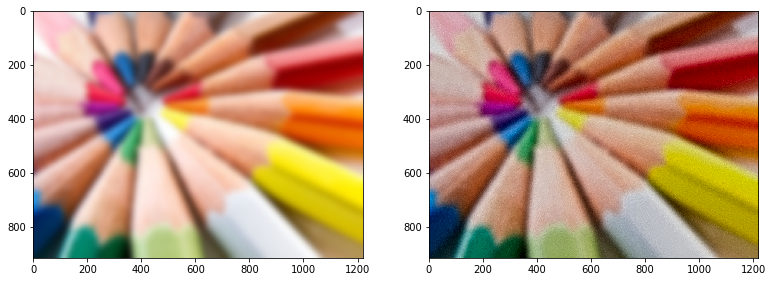

In [3]:
#Loading image.
img = load_img('images/myimg5_blur.jpeg')

#Creating a Gaussian filter here
g = gaussian_filter(13, 3)

#Converting image to L.a.b. color scale
lab = skimage.color.rgb2lab(img)

#Extracting the first channel to get the intensity-only image
L = lab[:,:,0]

#Convolving this new image L with the filter g to get a smoothed image Simg
Simg = convolve(L, g)

#Creating a new image by multiplying L by a small constant r and Simg by another small constant s
r = 15
s = 15
newL = r*L - s*Simg

#Normalizing new image so that its values are between 0 and 100
newL *= 100.0/newL.max() 

#Recombining this new L image with the previous a and b channels of the lab image in step #3.
lab[:,:,0] = newL

#Reconverting the L.a.b. image back to RGB with the command below (assuming the new L.a.b. image is called lab2)
img2 = skimage.color.lab2rgb(lab)

#Examining newly sharpened image and saving it to file
rcParams['figure.figsize'] = 13 ,9
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img2)